##                                 <center>Multi Layer Perceptron Implementation<center>
<img width = "400" src ="https://cdn-images-1.medium.com/max/1600/1*RGV6Bb3ChmVWsA8Q6Qth6Q.png">

In [253]:
import numpy as np

In [254]:
def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [255]:
a = np.array([[1,2,3],[4,6,5]])
softmax(a)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.66524096, 0.24472847]])

In [284]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model = {}
        ## Implementation of the architecture of Network
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['B1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['B2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['B3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
        
    def forward(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["B1"],self.model["B2"],self.model["B3"]
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["B1"],self.model["B2"],self.model["B3"]
        m = x.shape[0]
        a1,a2,y_ = self.activation_outputs 
        
        delta3 = y_- y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1= (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)
        
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3
        
        self.model["B1"] -= learning_rate*db1
        self.model["B2"] -= learning_rate*db2
        self.model["B3"] -= learning_rate*db3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    
    def summary(self):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        a1,a2,y_ = self.activation_outputs 
        
        print("W1: ",W1.shape)
        print("A1: ",a1.shape)
        
        print("W2: ",W2.shape)
        print("A2: ",a2.shape)
        
        print("W3: ",W3.shape)
        print("Y_: ",y_.shape)
        
        
        
        

In [285]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

### Training and Testing the Model

In [286]:
from sklearn.datasets import make_moons,make_circles,make_classification
import matplotlib.pyplot as plt

In [297]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)

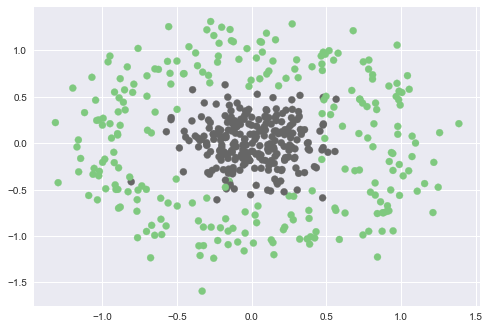

In [298]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y,cmap = plt.cm.Accent)
plt.show()

In [299]:
model = NeuralNetwork(input_size=2,layers = [10,5],output_size=2)

In [300]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    
    return training_loss

In [301]:
losses = train(X,Y,model,epochs=1000,learning_rate=0.001)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3554
Epoch 2 Loss 0.2593
Epoch 3 Loss 0.2407
Epoch 4 Loss 0.2258
Epoch 5 Loss 0.2132
Epoch 6 Loss 0.2020
Epoch 7 Loss 0.1919
Epoch 8 Loss 0.1827
Epoch 9 Loss 0.1742
Epoch 10 Loss 0.1664
Epoch 11 Loss 0.1593
Epoch 12 Loss 0.1527
Epoch 13 Loss 0.1467
Epoch 14 Loss 0.1411
Epoch 15 Loss 0.1360
Epoch 16 Loss 0.1313
Epoch 17 Loss 0.1270
Epoch 18 Loss 0.1230
Epoch 19 Loss 0.1193
Epoch 20 Loss 0.1159
Epoch 21 Loss 0.1127
Epoch 22 Loss 0.1098
Epoch 23 Loss 0.1070
Epoch 24 Loss 0.1045
Epoch 25 Loss 0.1021
Epoch 26 Loss 0.0999
Epoch 27 Loss 0.0978
Epoch 28 Loss 0.0958
Epoch 29 Loss 0.0940
Epoch 30 Loss 0.0922
Epoch 31 Loss 0.0906
Epoch 32 Loss 0.0891
Epoch 33 Loss 0.0876
Epoch 34 Loss 0.0862
Epoch 35 Loss 0.0849
Epoch 36 Loss 0.0837
Epoch 37 Loss 0.0825
Epoch 38 Loss 0.0814
Epoch 39 Loss 0.0803
Epoch 40 Loss 0.0793
Epoch 41 Loss 0.0783
Epoch 42 Loss 0.0774
Epoch 43 Loss 0.0765
Epoch 44 Loss 0.0756
Epoch 45 Loss 0.0748
Epoch 46 Loss 0.0740
Epoch 47 Loss 0.0732
Ep

Epoch 609 Loss 0.0384
Epoch 610 Loss 0.0384
Epoch 611 Loss 0.0384
Epoch 612 Loss 0.0384
Epoch 613 Loss 0.0384
Epoch 614 Loss 0.0384
Epoch 615 Loss 0.0383
Epoch 616 Loss 0.0383
Epoch 617 Loss 0.0383
Epoch 618 Loss 0.0383
Epoch 619 Loss 0.0383
Epoch 620 Loss 0.0383
Epoch 621 Loss 0.0383
Epoch 622 Loss 0.0383
Epoch 623 Loss 0.0383
Epoch 624 Loss 0.0383
Epoch 625 Loss 0.0383
Epoch 626 Loss 0.0383
Epoch 627 Loss 0.0383
Epoch 628 Loss 0.0382
Epoch 629 Loss 0.0382
Epoch 630 Loss 0.0382
Epoch 631 Loss 0.0382
Epoch 632 Loss 0.0382
Epoch 633 Loss 0.0382
Epoch 634 Loss 0.0382
Epoch 635 Loss 0.0382
Epoch 636 Loss 0.0382
Epoch 637 Loss 0.0382
Epoch 638 Loss 0.0382
Epoch 639 Loss 0.0382
Epoch 640 Loss 0.0382
Epoch 641 Loss 0.0381
Epoch 642 Loss 0.0381
Epoch 643 Loss 0.0381
Epoch 644 Loss 0.0381
Epoch 645 Loss 0.0381
Epoch 646 Loss 0.0381
Epoch 647 Loss 0.0381
Epoch 648 Loss 0.0381
Epoch 649 Loss 0.0381
Epoch 650 Loss 0.0381
Epoch 651 Loss 0.0381
Epoch 652 Loss 0.0381
Epoch 653 Loss 0.0381
Epoch 654 

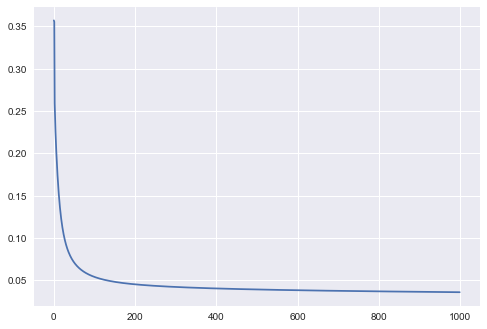

In [302]:
plt.plot(losses)
plt.show()